In [6]:
import numpy as np 
import pandas as pd 
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('Worksheet in Case Study question 2.xlsx')
data.head()
data.to_csv("Insurance.csv", index=False)
df = pd.read_csv('Insurance.csv')

Accuracy: 0.73
Confusion Matrix:
[[130  15]
 [ 39  16]]
Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.90      0.83       145
        True       0.52      0.29      0.37        55

    accuracy                           0.73       200
   macro avg       0.64      0.59      0.60       200
weighted avg       0.70      0.73      0.70       200



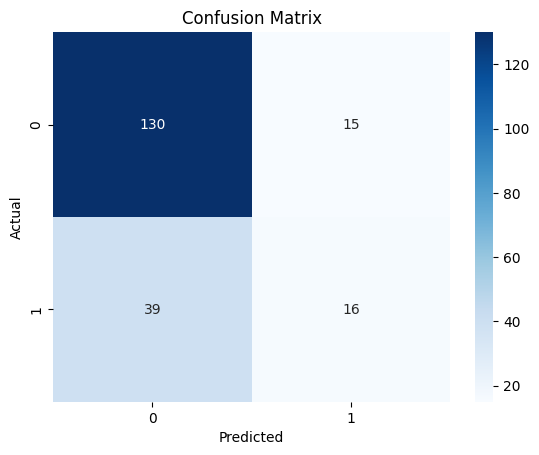

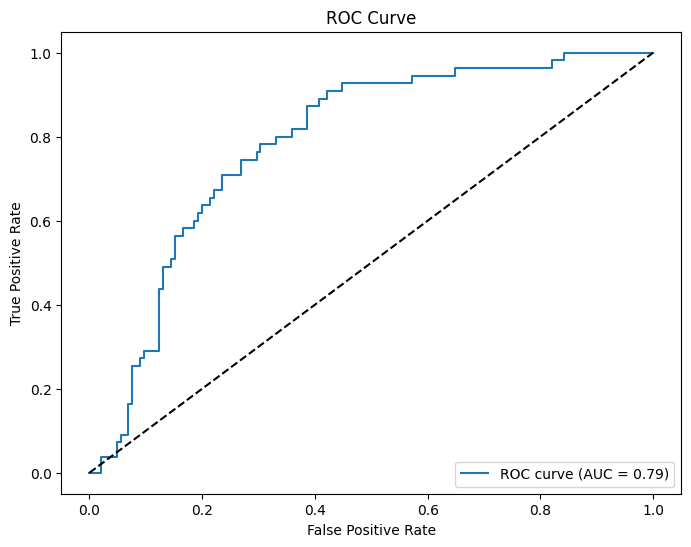

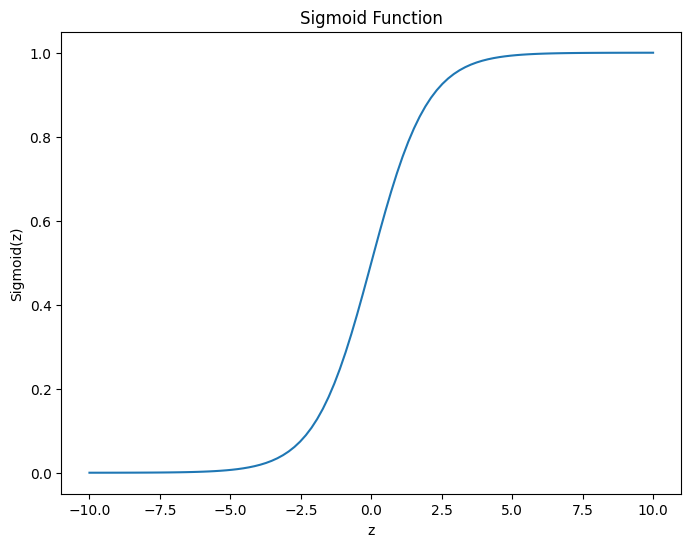

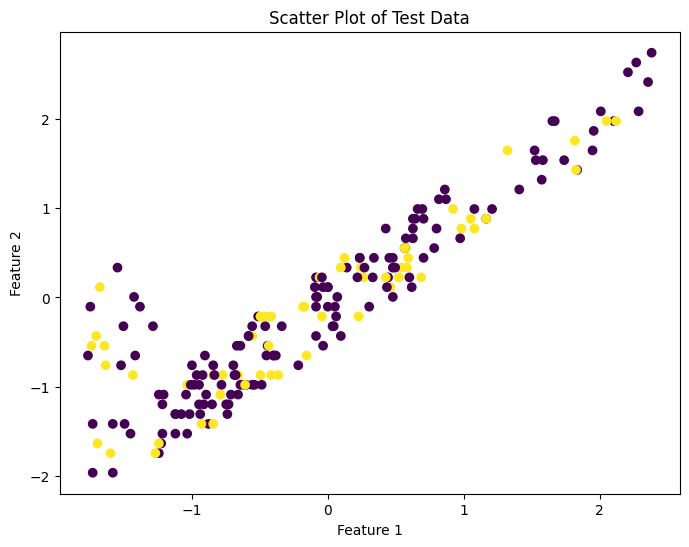

In [12]:
# Data Preprocessing
# 1. Handling Missing Values (Illustrative - adapt to your data)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# 2. Encoding Categorical Features (Illustrative - adapt to your data)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# 3. Feature Scaling (Optional but often beneficial)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 4. Define Features (X) and Target (y)
X = df.drop('fraud_reported_Y', axis=1)  # Assuming 'fraud_reported_Y' is the target
y = df['fraud_reported_Y']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Visualizations
# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

x_sigmoid = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(x_sigmoid)

plt.figure(figsize=(8, 6))
plt.plot(x_sigmoid, y_sigmoid)
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test) # Replace 0 and 1 with the desired feature indices
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Test Data')
plt.show()
